In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import math

In [2]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df.shape

(550068, 10)

- Data consists of 550068 rows and 10 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


- 5 out of 10 columns have data of type int and rest are of object type (string) and data seems to be clean without any null or missing values

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


- A significant difference in mean and median value indicate the existence of outliers

In [7]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


- user IDs are unique in all the rows
- There are 550068 products sold and there are 3631 unique products in them
- Out of 550068 customers, 414259 are male(75.31%)
- Customers are categorised in 7 age groups and in that customers between age 26-35 have done most of the pirchases. 219587 out of 550068(39.91%)
- Cities  are categorised into A,B and C and 231173 out of 550068 purchases happened in city category-B (42.02%)
- Stay in current city is the number of years customers have been staying in the city where purchase is done and the possible values are 0,1,2,3 and 4+ years
- 324731 customers are unmarried and 225337 are married
- All the 3631 unique products have been categorised into 20 unique product categories and are denoted by numbers from 1 to 20 
- Minimum amount of puchase is 12 and Maximum is 23961 with 9263 as mean puchase amount


In [8]:
Marital_status=df["Marital_Status"].value_counts()
Marital_status

0    324731
1    225337
Name: Marital_Status, dtype: int64

- Majority of customers are umnarried

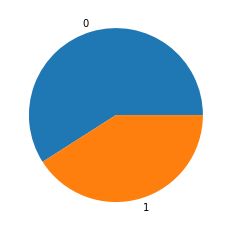

In [9]:
plt.pie(Marital_status,labels=Marital_status.index)
plt.show()

In [272]:
prdt_catgry_sales=df["Product_Category"].value_counts()
prdt_catgry_sales

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category'>

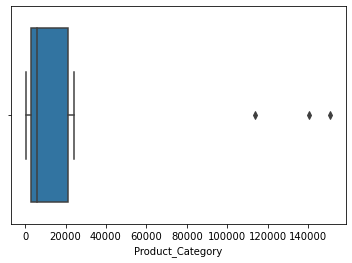

In [273]:
sns.boxplot(prdt_catgry_sales)

- there are 20 different product categories and in that categories 5,1,8 are outliers when the purchase is considered

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

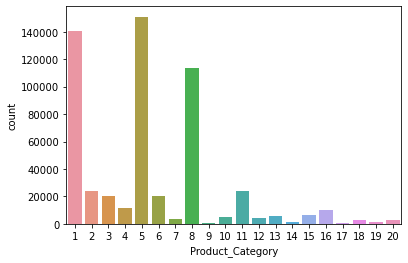

In [11]:
sns.countplot(x=df["Product_Category"])

In [12]:
Occupation_list=df["Occupation"].value_counts()
Occupation_list

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

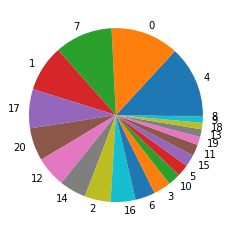

In [13]:
plt.pie(Occupation_list,labels=Occupation_list.index)
plt.show()

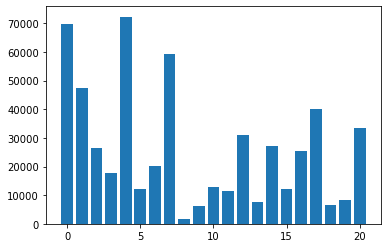

In [14]:
x=Occupation_list.index
y=Occupation_list
plt.bar(x,y)
plt.xticks(rotation=0)
plt.show()

In [15]:
Gender_count=df["Gender"].value_counts()
Gender_count

M    414259
F    135809
Name: Gender, dtype: int64

- majority of customers are Males. 

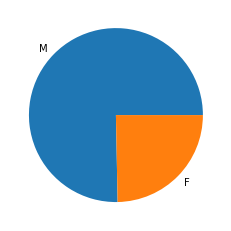

In [16]:
plt.pie(Gender_count,labels=Gender_count.index)
plt.show()

In [17]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

- majority of customers belong to the age group 26-35

<AxesSubplot:xlabel='Age', ylabel='count'>

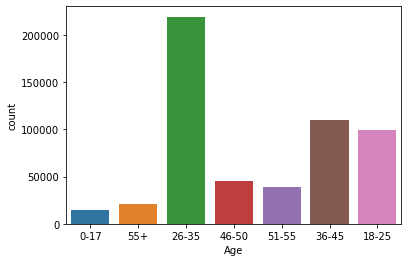

In [18]:
sns.countplot(x=df["Age"])

In [19]:
City=df["City_Category"].value_counts()
City

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

- most customers belong to city category-B

<AxesSubplot:xlabel='City_Category', ylabel='count'>

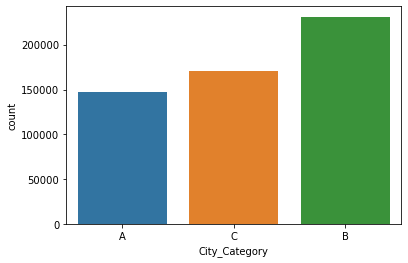

In [20]:
sns.countplot(x=df["City_Category"])

In [21]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

- customers who live in the current city since 1-2 years constitute majority of customers

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

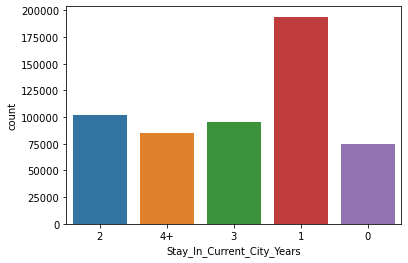

In [ ]:
sns.countplot(x=df["Stay_In_Current_City_Years"])

In [ ]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [24]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

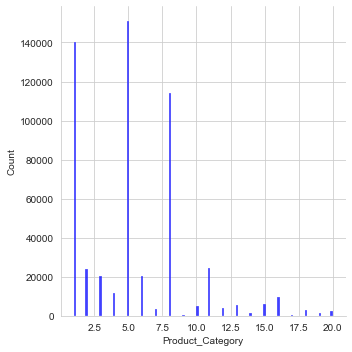

In [25]:
sns.set_style('whitegrid')
sns.displot(df['Product_Category'], kde = False, color ='blue')

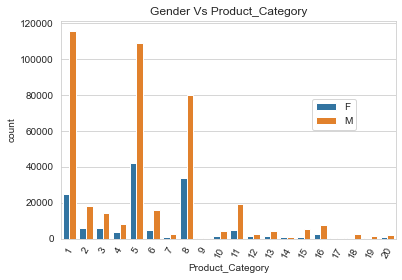

In [26]:
sns.countplot(data=df,
x="Product_Category",
hue="Gender",)
plt.title('Gender Vs Product_Category')
plt.xticks(rotation=60)
plt.legend(loc=(0.75,0.5))
plt.show()

In [ ]:
sns.pairplot(df, hue ='Age')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x84db9355b0>,
 'caps': [<matplotlib.lines.Line2D at 0x84db935c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x84db927040>],
 'medians': [<matplotlib.lines.Line2D at 0x84db943130>],
 'fliers': [<matplotlib.lines.Line2D at 0x84db943400>],
 'means': []}

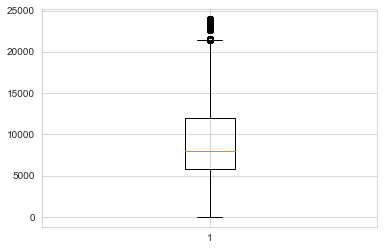

In [27]:
plt.boxplot(x=df["Purchase"])

In [28]:
P_25=np.percentile(df["Purchase"],25)
P_75=np.percentile(df["Purchase"],75)
IQR=P_75-P_25
Upper=P_75+1.5*IQR
Upper

21400.5

- All the purchase values above 21400.5 is considered as an outlier

In [29]:
Purchase_outlier=df[df["Purchase"]>Upper]
len(Purchase_outlier)

2677

- There are 2677 purchase values that are considered as outliers

In [30]:
Percentage_of_outliers=len(Purchase_outlier)/len(df)*100
Percentage_of_outliers

0.4866671029763593

- 0.4867 percentage of purchase amount is outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x84d493bf40>,
 'caps': [<matplotlib.lines.Line2D at 0x84d494b520>,
 'boxes': [<matplotlib.lines.Line2D at 0x84d493bc70>],
 'medians': [<matplotlib.lines.Line2D at 0x84d494bac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x84d494bd90>],
 'means': []}

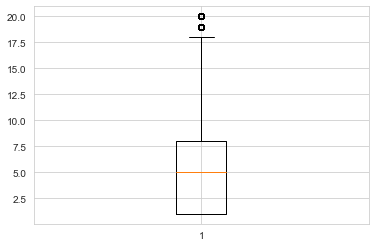

In [32]:
plt.boxplot(x=df["Product_Category"])

In [6]:
Male_purchases=df[df["Gender"]=="M"]

In [7]:
np.mean(Male_purchases["Purchase"])

9437.526040472265

In [8]:
Female_purchases=df[df["Gender"]=="F"]
np.mean(Female_purchases["Purchase"])

8734.565765155476

- On an average Male customers spend 9437 whereas Female customers spend 8734

In [9]:
Male_purchases["Age"].value_counts()

26-35    168835
36-45     82843
18-25     75032
46-50     32502
51-55     28607
55+       16421
0-17      10019
Name: Age, dtype: int64

In [10]:
Female_purchases["Age"].value_counts()

26-35    50752
36-45    27170
18-25    24628
46-50    13199
51-55     9894
0-17      5083
55+       5083
Name: Age, dtype: int64

- Minimum number of purchase by males are double that of females
- In males,age group between 0-17 are doing least number of purchases where are in females,age group above 55 is doing least number of purchases

In [11]:
Male_purchases[Male_purchases["Age"]=="26-35"]["Purchase"].mean()

9410.337578108805

In [12]:
Male_age_group=Male_purchases.groupby("Age").agg({"Purchase":"mean"})
Male_age_group

,Purchase
Age,
0-17,9235.173670
18-25,9440.942971
26-35,9410.337578
36-45,9453.193643
46-50,9357.471509
51-55,9705.094802
55+,9438.195603


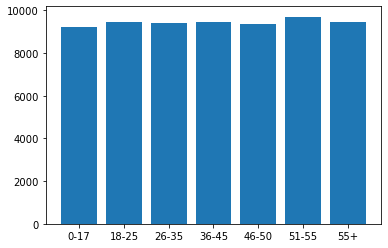

In [13]:
x=Male_age_group.index
y=Male_age_group["Purchase"]
plt.bar(x,y)
plt.xticks(rotation=0)
plt.show()

- Males of all age groups are spending an average of minimum of 9000

In [14]:
Female_age_group=Female_purchases.groupby("Age").agg({"Purchase":"mean"})
Female_age_group

,Purchase
Age,
0-17,8338.771985
18-25,8343.180201
26-35,8728.251754
36-45,8959.844056
46-50,8842.098947
51-55,9042.449666
55+,9007.036199


- Females of all age groups are spending an average of  maximum of 9000

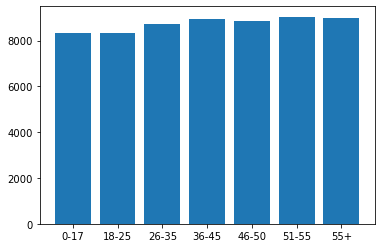

In [15]:
x=Female_age_group.index
y=Female_age_group["Purchase"]
plt.bar(x,y)
plt.xticks(rotation=0)
plt.show()

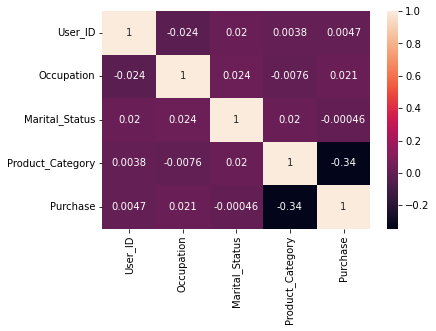

In [16]:
df_heatplot = sns.heatmap(df.corr(), annot=True)

#### Bootstrapping

In [20]:
Female_sample=Female_purchases["Purchase"]

In [21]:
Female_sample

0          8370
1         15200
2          1422
3          1057
14         5378
          ...  
550061      599
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 135809, dtype: int64

In [30]:
bootstrapped_female_mean_survey=[]
for reps in range(5000):
    bootstrapped_female_samples=np.random.choice(Female_sample,size=1000)
    bootstrapped_female_mean=np.mean(bootstrapped_female_samples)
    bootstrapped_female_mean_survey.append(bootstrapped_female_mean)


In [29]:
# bootstrapped_female_mean_survey

<AxesSubplot:ylabel='Count'>

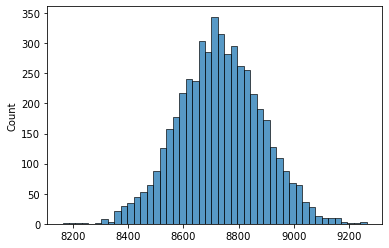

In [31]:
sns.histplot(bootstrapped_female_mean_survey)

In [32]:
np.percentile(bootstrapped_female_mean_survey,[0,100])

array([8162.693, 9264.335])

In [35]:
np.percentile(bootstrapped_female_mean_survey,[0.5,99.5])

array([8357.15461, 9130.10057])

In [33]:
np.percentile(bootstrapped_female_mean_survey,[2.5,97.5])

array([8434.285775, 9026.281475])

In [34]:
np.percentile(bootstrapped_female_mean_survey,[5,95])

array([8486.3995, 8980.1579])

In [36]:
Male_sample=Male_purchases["Purchase"]

In [37]:
Male_sample

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

In [38]:
bootstrapped_male_mean_survey=[]
for reps in range(5000):
    bootstrapped_male_samples=np.random.choice(Male_sample,size=1000)
    bootstrapped_male_mean=np.mean(bootstrapped_male_samples)
    bootstrapped_male_mean_survey.append(bootstrapped_male_mean)


<AxesSubplot:ylabel='Count'>

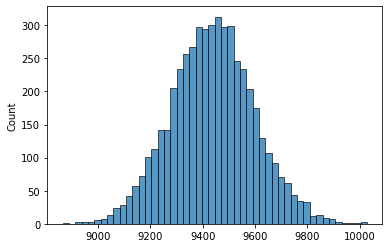

In [42]:
sns.histplot(bootstrapped_male_mean_survey)

In [43]:
np.percentile(bootstrapped_male_mean_survey,[0,100])

array([ 8863.907, 10027.366])

In [44]:
np.percentile(bootstrapped_male_mean_survey,[0.5,99.5])

array([9048.61275, 9846.00857])

In [46]:
np.percentile(bootstrapped_male_mean_survey,[2.5,97.5])

array([9127.8587  , 9754.686475])

In [47]:
np.percentile(bootstrapped_male_mean_survey,[5,95])

array([9175.98925, 9701.87495])

- Average purchase amount by Female=8734.565765155476
- Average purchase amount by Male=9437.526040472265
- 100% CI-Female-[8162.693, 9264.335]
- 100% CI-Male-[ 8863.907, 10027.366]
- 99% CI-Female-[8357.15461, 9130.10057]
- 99% CI-Male-[9048.61275, 9846.00857]
- 95% CI-Female-[8434.285775, 9026.281475]
- 95% CI-Male-[9127.8587  , 9754.686475]
- 90% CI-Female-[8486.3995, 8980.1579]
- 90% CI-Male-[9175.98925, 9701.87495]

In [48]:
Married=df[df["Marital_Status"]==1]

In [143]:
Married_avg_purchase=Married["Purchase"].mean()
Married_avg_purchase

9261.174574082374

In [51]:
Married_sample=Married["Purchase"]

In [52]:
bootstrapped_married_mean_survey=[]
for reps in range(5000):
    bootstrapped_married_samples=np.random.choice(Married_sample,size=1000)
    bootstrapped_married_mean=np.mean(bootstrapped_married_samples)
    bootstrapped_married_mean_survey.append(bootstrapped_married_mean)

<AxesSubplot:ylabel='Count'>

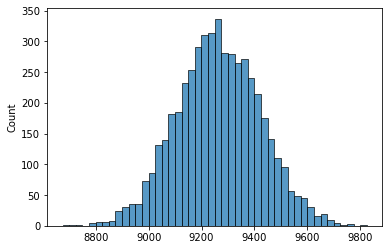

In [53]:
sns.histplot(bootstrapped_married_mean_survey)

In [58]:
np.percentile(bootstrapped_married_mean_survey,[0,100])

array([8673.473, 9826.159])

In [59]:
np.percentile(bootstrapped_married_mean_survey,[0.5,99.5])

array([8868.015895, 9664.99103 ])

In [60]:
np.percentile(bootstrapped_married_mean_survey,[2.5,97.5])

array([8956.187825, 9577.8229  ])

In [61]:
np.percentile(bootstrapped_married_mean_survey,[5,95])

array([9006.11795, 9520.641  ])

In [62]:
Unmarried=df[df["Marital_Status"]==0]

In [142]:
Unmarried_avg_purchase=Unmarried["Purchase"].mean()
Unmarried_avg_purchase

9265.907618921507

In [63]:
Unmarried_sample=Unmarried["Purchase"]

In [64]:
bootstrapped_unmarried_mean_survey=[]
for reps in range(5000):
    bootstrapped_unmarried_samples=np.random.choice(Unmarried_sample,size=1000)
    bootstrapped_unmarried_mean=np.mean(bootstrapped_unmarried_samples)
    bootstrapped_unmarried_mean_survey.append(bootstrapped_unmarried_mean)

<AxesSubplot:ylabel='Count'>

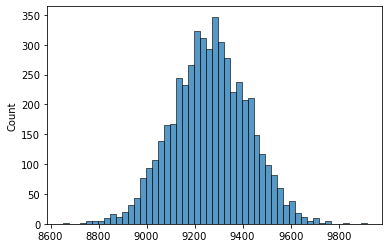

In [66]:
sns.histplot(bootstrapped_unmarried_mean_survey)

In [67]:
np.percentile(bootstrapped_unmarried_mean_survey,[0,100])

array([8650.12 , 9917.639])

In [68]:
np.percentile(bootstrapped_unmarried_mean_survey,[0.5,99.5])

array([8849.05853 , 9665.023455])

In [69]:
np.percentile(bootstrapped_unmarried_mean_survey,[2.5,97.5])

array([8960.1891  , 9568.316675])

In [70]:
np.percentile(bootstrapped_unmarried_mean_survey,[5,95])

array([9006.2514 , 9523.57225])

- Average purchase amount by Unmarried=9265.907618921507
- Average purchase amount by Married=9261.174574082374
- 100% CI-Married-[8673.473, 9826.159]
- 100% CI-Unmarried-[8650.12 , 9917.639]
- 99% CI-Married-[8868.015895, 9664.99103]
- 99% CI-Unmarried-[8849.05853 , 9665.023455]
- 95% CI-Married-[8956.187825, 9577.8229]
- 95% CI-Unmarried-[8960.1891  , 9568.316675]
- 90% CI-Married-[9006.11795, 9520.641]
- 90% CI-Unmarried-[9006.2514 , 9523.57225]

In [98]:
Kids=df[df["Age"]=="0-17"]
Youth=df[df["Age"]=="18-25"]
Adult=df[df["Age"]=="26-35"]
Middle_aged=df[(df["Age"]=="36-45")|(df["Age"]=="46-50")]
Seniors=df[(df["Age"]=="51-55")|(df["Age"]=="55+")]

In [144]:
Average_purchase_amount_by_Kids=Kids["Purchase"].mean()
Average_purchase_amount_by_Kids

8933.464640444974

In [107]:
Kids_sample=Kids["Purchase"]
bootstrapped_Kids_mean_survey=[]
for reps in range(5000):
    bootstrapped_Kids_samples=np.random.choice(Kids_sample,size=1000)
    bootstrapped_Kids_mean=np.mean(bootstrapped_Kids_samples)
    bootstrapped_Kids_mean_survey.append(bootstrapped_Kids_mean)

<AxesSubplot:ylabel='Count'>

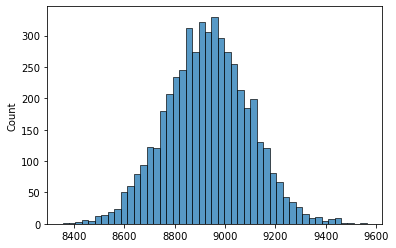

In [108]:
sns.histplot(bootstrapped_Kids_mean_survey)

In [109]:
np.percentile(bootstrapped_Kids_mean_survey,[0,100])

array([8354.282, 9563.265])

In [110]:
np.percentile(bootstrapped_Kids_mean_survey,[0.5,99.5])

array([8498.962145, 9390.677945])

In [111]:
np.percentile(bootstrapped_Kids_mean_survey,[2.5,97.5])

array([8606.3278, 9251.7363])

In [112]:
np.percentile(bootstrapped_Kids_mean_survey,[5,95])

array([8657.53895, 9195.7602 ])

In [113]:
Youth_sample=Youth["Purchase"]

In [145]:
Average_purchase_amount_by_Youth=Youth["Purchase"].mean()
Average_purchase_amount_by_Youth

9169.663606261289

In [114]:
bootstrapped_Youth_mean_survey=[]
for reps in range(5000):
    bootstrapped_Youth_samples=np.random.choice(Youth_sample,size=1000)
    bootstrapped_Youth_mean=np.mean(bootstrapped_Youth_samples)
    bootstrapped_Youth_mean_survey.append(bootstrapped_Youth_mean)

<AxesSubplot:ylabel='Count'>

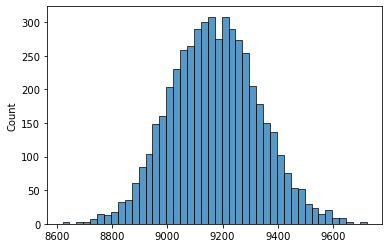

In [115]:
sns.histplot(bootstrapped_Youth_mean_survey)

In [116]:
np.percentile(bootstrapped_Youth_mean_survey,[0,100])

array([8620.421, 9722.582])

In [117]:
np.percentile(bootstrapped_Youth_mean_survey,[0.5,99.5])

array([8766.69614, 9590.29594])

In [118]:
np.percentile(bootstrapped_Youth_mean_survey,[2.5,97.5])

array([8870.53055, 9488.90365])

In [119]:
np.percentile(bootstrapped_Youth_mean_survey,[5,95])

array([8915.60265, 9435.1068 ])

In [120]:
Adult_sample=Adult["Purchase"]

In [146]:
Average_purchase_amount_by_Adult=Adult["Purchase"].mean()
Average_purchase_amount_by_Adult

9252.690632869888

In [121]:
bootstrapped_Adult_mean_survey=[]
for reps in range(5000):
    bootstrapped_Adult_samples=np.random.choice(Adult_sample,size=1000)
    bootstrapped_Adult_mean=np.mean(bootstrapped_Adult_samples)
    bootstrapped_Adult_mean_survey.append(bootstrapped_Adult_mean)

<AxesSubplot:ylabel='Count'>

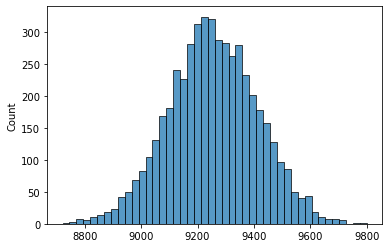

In [122]:
sns.histplot(bootstrapped_Adult_mean_survey)

In [123]:
np.percentile(bootstrapped_Adult_mean_survey,[0,100])

array([8721.546, 9800.295])

In [124]:
np.percentile(bootstrapped_Adult_mean_survey,[0.5,99.5])

array([8841.30993 , 9661.666255])

In [125]:
np.percentile(bootstrapped_Adult_mean_survey,[2.5,97.5])

array([8941.092075, 9564.7298  ])

In [126]:
np.percentile(bootstrapped_Adult_mean_survey,[5,95])

array([8993.2574, 9512.9215])

In [147]:
Middle_aged_sample=Middle_aged["Purchase"]
Average_purchase_amount_by_Middle_aged=Middle_aged["Purchase"].mean()
Average_purchase_amount_by_Middle_aged

9295.331742810537

In [128]:
bootstrapped_Middle_aged_mean_survey=[]
for reps in range(5000):
    bootstrapped_Middle_aged_samples=np.random.choice(Middle_aged_sample,size=1000)
    bootstrapped_Middle_aged_mean=np.mean(bootstrapped_Middle_aged_samples)
    bootstrapped_Middle_aged_mean_survey.append(bootstrapped_Middle_aged_mean)

<AxesSubplot:ylabel='Count'>

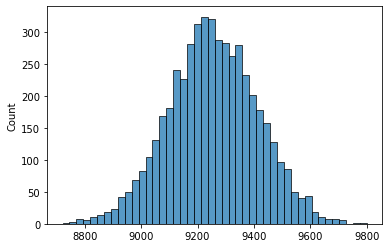

In [129]:
sns.histplot(bootstrapped_Adult_mean_survey)

In [130]:
np.percentile(bootstrapped_Middle_aged_mean_survey,[0,100])

array([8768.69 , 9890.201])

In [131]:
np.percentile(bootstrapped_Middle_aged_mean_survey,[0.5,99.5])

array([8898.190635, 9709.43755 ])

In [132]:
np.percentile(bootstrapped_Middle_aged_mean_survey,[2.5,97.5])

array([8981.2715 , 9605.71245])

In [133]:
np.percentile(bootstrapped_Middle_aged_mean_survey,[5,95])

array([9030.93575, 9563.10445])

In [275]:
Seniors_sample=Seniors["Purchase"]
Seniors_sample.mean()

9463.661678193484

In [135]:
bootstrapped_Seniors_mean_survey=[]
for reps in range(5000):
    bootstrapped_Seniors_samples=np.random.choice(Seniors_sample,size=1000)
    bootstrapped_Seniors_mean=np.mean(bootstrapped_Seniors_samples)
    bootstrapped_Seniors_mean_survey.append(bootstrapped_Seniors_mean)

<AxesSubplot:ylabel='Count'>

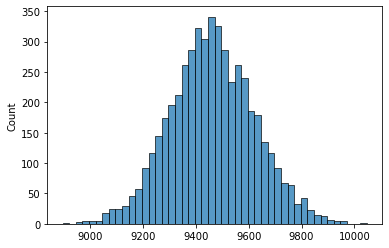

In [136]:
sns.histplot(bootstrapped_Seniors_mean_survey)

In [137]:
np.percentile(bootstrapped_Seniors_mean_survey,[0,100])

array([ 8895.603, 10047.106])

In [138]:
np.percentile(bootstrapped_Seniors_mean_survey,[0.5,99.5])

array([9058.336965, 9885.305235])

In [139]:
np.percentile(bootstrapped_Seniors_mean_survey,[2.5,97.5])

array([9152.864875, 9783.622225])

In [140]:
np.percentile(bootstrapped_Seniors_mean_survey,[5,95])

array([9205.1241 , 9731.01905])

- Average purchase amount by Kids=8933.464640444974
- Average purchase amount by Youth=9169.663606261289
- Average purchase amount by Adult=9252.690632869888
- Average purchase amount by Middle_aged=9295.331742810537
- Average purchase amount by Seniors=9463.661678193484
- 100% CI-Kids=[8354.282, 9563.265]
- 100% CI-Youth=[8620.421, 9722.582]
- 100% CI-Adult=[8721.546, 9800.295]
- 100% CI-Middle_aged=[8768.69 , 9890.201]
- 100% CI-Seniors=[ 8895.603, 10047.106]
- 99% CI-Kids=[8498.962145, 9390.677945]
- 99% CI-Youth=[8498.962145, 9390.677945]
- 99% CI-Adult=[8841.30993 , 9661.666255]
- 99% CI-Middle_aged=[8898.190635, 9709.43755 ]
- 99% CI-Seniors=[9058.336965, 9885.305235]
- 95% CI-Kids=[8606.3278, 9251.7363]
- 95% CI-Youth=[8870.53055, 9488.90365]
- 95% CI-Adult=[8941.092075, 9564.7298  ]
- 95% CI-Middle_aged=[8981.2715 , 9605.71245]
- 95% CI-Seniors=[9152.864875, 9783.622225]
- 90% CI-Kids=[8657.53895, 9195.7602 ]
- 90% CI-Youth=[8915.60265, 9435.1068 ]
- 90% CI-Adult=[8993.2574, 9512.9215]
- 90% CI-Middle_aged=[9030.93575, 9563.10445]
- 90% CI-Seniors=[9205.1241 , 9731.01905]

#### Central Limit Theorem

In [148]:
Clt_male=df[df["Gender"]=="M"]

In [150]:
Clt_male_purchase=Clt_male["Purchase"]
Clt_male_purchase

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

In [151]:
Clt_male_purchase.mean()

9437.526040472265

In [172]:
min(Sample_mean_trend)

7924.96

In [173]:
max(Sample_mean_trend)

11030.23

In [152]:
Clt_male["Purchase"].sample(5)

99547     15183
415621     5614
399703    19654
11550     12999
182236    13842
Name: Purchase, dtype: int64

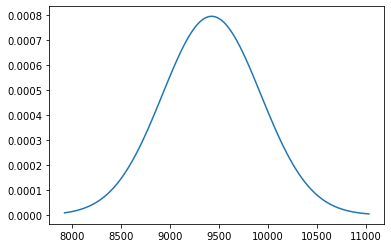

In [206]:
Sample_mean_trend=[]
for purchase in range(2000):
    sample=Clt_male["Purchase"].sample(100)
    sample_mean=np.mean(sample)
    Sample_mean_trend.append(sample_mean)
# plt.hist(Sample_mean_trend[0:], 20, normed=True)
zscore = stats.zscore(Sample_mean_trend[0:])
mu, sigma = np.mean(Sample_mean_trend), np.std(Sample_mean_trend)
# s = np.random.normal(mu, sigma, 10000)
# count, bins, ignored = plt.hist(s, 20, normed=True)
x = np.linspace(7924.96, 11030.23, num=100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

In [207]:
mu=sum(Sample_mean_trend)/float(len(Sample_mean_trend))
mu

9425.662800000007

In [208]:
std=mu/math.sqrt(2000)
std

210.7642275379102

In [221]:
Z1=norm.ppf(0.005)
Z2=norm.ppf(0.995)
x1_99=mu+(Z1*std)
x2_99=mu+(Z2*std)


In [222]:
x1_99

8882.77012656801

In [223]:
x2_99

9968.555473432005

In [235]:
Z1=norm.ppf(0.05)
Z2=norm.ppf(0.95)
x1_90=mu+(Z1*std)
x2_90=mu+(Z2*std)

In [236]:
x1_90


9078.98649590265

In [237]:
x2_90

9772.339104097364

In [238]:
Z1=norm.ppf(0.025)
Z2=norm.ppf(0.975)
x1_95=mu+(Z1*std)
x2_95=mu+(Z2*std) 

In [239]:
x1_95

9012.572504796299

In [240]:
x2_95

9838.753095203716

In [243]:
Clt_female=df[df["Gender"]=="F"]

In [246]:
min(Sample_mean_trend_female)

7265.75

In [248]:
max(Sample_mean_trend_female)

10428.33

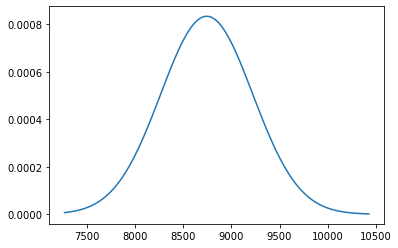

In [249]:
Sample_mean_trend_female=[]
for purchase in range(2000):
    sample=Clt_female["Purchase"].sample(100)
    sample_mean=np.mean(sample)
    Sample_mean_trend_female.append(sample_mean)
# plt.hist(Sample_mean_trend[0:], 20, normed=True)
zscore_f = stats.zscore(Sample_mean_trend_female[0:])
mu_f, sigma_f = np.mean(Sample_mean_trend_female), np.std(Sample_mean_trend_female)
# s = np.random.normal(mu, sigma, 10000)
# count, bins, ignored = plt.hist(s, 20, normed=True)
x = np.linspace(7265.75, 10428.33, num=100)
plt.plot(x, stats.norm.pdf(x, mu_f, sigma_f))

In [254]:
mu_f=sum(Sample_mean_trend_female)/float(len(Sample_mean_trend))
mu_f

8742.921810000002

In [255]:
std_f=mu_f/math.sqrt(2000)
std_f

195.49767489125503

In [260]:
Z1=norm.ppf(0.005)
Z2=norm.ppf(0.995)
x1_99_f=mu_f+(Z1*std_f)
x2_99_f=mu_f+(Z2*std_f)


In [261]:
x1_99_f

8239.35317023943

In [262]:
x2_99_f

9246.490449760573

In [263]:
Z1=norm.ppf(0.05)
Z2=norm.ppf(0.95)
x1_90_f=mu_f+(Z1*std_f)
x2_90_f=mu_f+(Z2*std_f)

In [264]:
x1_90_f

8421.356750394541

In [265]:
x2_90_f

9064.486869605462

In [266]:
Z1=norm.ppf(0.025)
Z2=norm.ppf(0.975)
x1_95_f=mu_f+(Z1*std_f)
x2_95_f=mu_f+(Z2*std_f)

In [267]:
x1_95_f

8359.75340815182

In [268]:
x2_95_f

9126.090211848183

## Average spending based on gender,age and marital status in different confidence intervals
- Average purchase amount by Female=8742.921810000002
- Average purchase amount by Male=9425.662800000007

- 99% CI-Female-[8239.35317023943, 9246.490449760573]
- 99% CI-Male-[8882.77012656801, 9968.555473432005]
- 95% CI-Female-[8359.75340815182, 9126.090211848183]
- 95% CI-Male-[9012.572504796299 , 9838.753095203716]
- 90% CI-Female-[8421.356750394541, 9064.486869605462]
- 90% CI-Male-[9078.98649590265, 9772.339104097364]

- Average purchase amount by Kids=8933.464640444974
- Average purchase amount by Youth=9169.663606261289
- Average purchase amount by Adult=9252.690632869888
- Average purchase amount by Middle_aged=9295.331742810537
- Average purchase amount by Seniors=
- 100% CI-Kids=[8354.282, 9563.265]
- 100% CI-Youth=[8620.421, 9722.582]
- 100% CI-Adult=[8721.546, 9800.295]
- 100% CI-Middle_aged=[8768.69 , 9890.201]
- 100% CI-Seniors=[ 8895.603, 10047.106]
- 99% CI-Kids=[8498.962145, 9390.677945]
- 99% CI-Youth=[8766.69614, 9590.29594]
- 99% CI-Adult=[8841.30993 , 9661.666255]
- 99% CI-Middle_aged=[8898.190635, 9709.43755 ]
- 99% CI-Seniors=[9058.336965, 9885.305235]
- 95% CI-Kids=[8606.3278, 9251.7363]
- 95% CI-Youth=[8870.53055, 9488.90365]
- 95% CI-Adult=[8941.092075, 9564.7298  ]
- 95% CI-Middle_aged=[8981.2715 , 9605.71245]
- 95% CI-Seniors=[9152.864875, 9783.622225]
- 90% CI-Kids=[8657.53895, 9195.7602 ]
- 90% CI-Youth=[8915.60265, 9435.1068 ]
- 90% CI-Adult=[8993.2574, 9512.9215]
- 90% CI-Middle_aged=[9030.93575, 9563.10445]
- 90% CI-Seniors=[9205.1241 , 9731.01905]

- Average purchase amount by Unmarried=9265.907618921507
- Average purchase amount by Married=9261.174574082374
- 100% CI-Married-[8673.473, 9826.159]
- 100% CI-Unmarried-[8650.12 , 9917.639]
- 99% CI-Married-[8868.015895, 9664.99103]
- 99% CI-Unmarried-[8849.05853 , 9665.023455]
- 95% CI-Married-[8956.187825, 9577.8229]
- 95% CI-Unmarried-[8960.1891  , 9568.316675]
- 90% CI-Married-[9006.11795, 9520.641]
- 90% CI-Unmarried-[9006.2514 , 9523.57225]

- Average purchase amount by Female=8734.565765155476
- Average purchase amount by Male=9437.526040472265
- 100% CI-Female-[8162.693, 9264.335]
- 100% CI-Male-[ 8863.907, 10027.366]
- 99% CI-Female-[8357.15461, 9130.10057]
- 99% CI-Male-[9048.61275, 9846.00857]
- 95% CI-Female-[8434.285775, 9026.281475]
- 95% CI-Male-[9127.8587  , 9754.686475]
- 90% CI-Female-[8486.3995, 8980.1579]
- 90% CI-Male-[9175.98925, 9701.87495]

- On an average women are spending less than men.The number o women below 17 and above are very less considered to men in the same group. This may be due to health or age restrictions.But when women of age above 51 are purchasing they are doing it in par with males of the same age.
- Confidence intervals and distribution of the mean of the expenses by female and male customers- given above for confidence inetrvals of 90,95 and 99
- confidence intervals of average male and female spending is not overlapping in 90% confidence interval only in bootstrapping method.
- confidence intervals of average male and female spending is overlapping in 99% and 95% confidence interval only in CLT method.
- confidence intervals of married and unmarried spending is overlapping all confidence intervals considered
- confidence intervals of spending in kids and seniors are not overlapping in 90% confidence interval, all others are coinciding.But that is not something to be considered because most of the kids are accompanied by elders and the elders are the ones who are a part of the custonmer base.Still if we give good offers to kids they can turn out to be potential customers in the future as they grow up.
 

## Recommendations
- Walmart should try to increase the customer base of women by giving some special offers to females
- There is a decline in count of customers who are living in the current city for more than 4 years. So walmart should give special offers to their older customers(in terms of time).
- Also the decline in number of people who are used to the city can mean they have some other store that might be giving better products at a lesser rate. this should be considered and studied.
- Similarly as the number of customers who are new to the city are also less, there should be some offers that customers can avail, when they visit a store for the first time. like a cash back for first purchase.
- Females of age <17 and >55 are the least among customers. there should be some way to attract older women and girl kids to the store.Like by re-introducing the products that older women used to love when they were younger or make them nostalgic
- The reason of less women customers may be due to the fact that men might be paying and their details getting into the database. Usually memeberships are taken from only one family member and that are geneally men.So motivate women to take memberships and give good customer services and safe environment that women encouraged to buy more.
- Give menbership to kids as they are potential customers of future.

## Business Insights based on Non- Graphical and Visual Analysis 
- User IDs are unique in all the rows(No duplicates)
- There are 550068 products sold and there are 3631 unique products in them
- Out of 550068 customers, 414259 are male(75.31%)
- Customers are categorised in 7 age groups and in that customers between age 26-35 have done most of the pirchases. 219587 out of 550068(39.91%)
- Cities  are categorised into A,B and C and 231173 out of 550068 purchases happened in city category-B (42.02%)
- Stay in current city is the number of years customers have been staying in the city where purchase is done and the possible values are 0,1,2,3 and 4+ years
- 324731 customers are unmarried and 225337 are married
- All the 3631 unique products have been categorised into 20 unique product categories and are denoted by numbers from 1 to 20 
- Minimum amount of puchase is 12 and Maximum is 23961 with 9263 as mean puchase amount
- when the purchase average is considered with gender  as well as age group, there is a clear boundary between females and males. Among women maximum is spent by women between 51-5 and that comes around 9042 and the minimum among men in age between 0-17 and its 9235. So the clear distinction in average spending can be seen.

#### insights on outliers are given under corresponding analyses above

#### comments on univariate and bivarate analysis are given along with the analysis above